# Data Cleaning

In [1]:
# all imports
import numpy as np
import pandas as pd
import pandas_profiling
%matplotlib inline
import matplotlib.pyplot as plt

## Loading

File descriptions:
- **train.csv** - Training set of 250000 events. The file starts with the ID column, then the label column (the y you have to predict), and finally 30 feature columns.
- **test.csv** -The test set of around 568238 events - Everything as above, except the label is missing.

Some details to get started:

- all variables are floating point, except PRI_jet_num which is integer
- variables prefixed with PRI (for PRImitives) are “raw” quantities about the bunch collision as measured by the detector.
- variables prefixed with DER (for DERived) are quantities computed from the primitive features, which were selected by  the physicists of ATLAS
- it can happen that for some entries some variables are meaningless or cannot be computed; in this case, their value is −999.0, which is outside the normal range of all variables

Prediction **"b"** or **"s"** indicates if the prediction for the event is **background** or **signal**. 

### Train Data

In [2]:
df_train = pd.read_csv("data/train.csv")
df_train.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,100002,b,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,100003,b,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,100004,b,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [3]:
df_train.dtypes

Id                               int64
Prediction                      object
DER_mass_MMC                   float64
DER_mass_transverse_met_lep    float64
DER_mass_vis                   float64
DER_pt_h                       float64
DER_deltaeta_jet_jet           float64
DER_mass_jet_jet               float64
DER_prodeta_jet_jet            float64
DER_deltar_tau_lep             float64
DER_pt_tot                     float64
DER_sum_pt                     float64
DER_pt_ratio_lep_tau           float64
DER_met_phi_centrality         float64
DER_lep_eta_centrality         float64
PRI_tau_pt                     float64
PRI_tau_eta                    float64
PRI_tau_phi                    float64
PRI_lep_pt                     float64
PRI_lep_eta                    float64
PRI_lep_phi                    float64
PRI_met                        float64
PRI_met_phi                    float64
PRI_met_sumet                  float64
PRI_jet_num                      int64
PRI_jet_leading_pt       

In [4]:
df_train.shape

(250000, 32)

In [5]:
df_train[df_train.DER_mass_MMC == -999].shape[0]

38114

In [6]:
df_train = df_train.replace(-999, np.nan)

In [7]:
profile = pandas_profiling.ProfileReport(df_train)
profile.to_file(outputfile="train_data_profiling.html")
profile

Number of variables,32
Number of observations,250000
Total Missing (%),19.8%
Total size in memory,61.0 MiB
Average record size in memory,256.0 B
Numeric,28
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,3


In [8]:
df_train[np.isnan(df_train.PRI_jet_subleading_pt)].shape[0]

177457

In [9]:
df_train[np.logical_or(df_train.PRI_jet_num == 0, df_train.PRI_jet_num == 1)].shape[0]

177457

### Test Data

In [10]:
df_test = pd.read_csv("data/test.csv")
df_test.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,350000,?,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,...,2.022,98.556,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
1,350001,?,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,...,-1.138,176.251,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575
2,350002,?,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,...,-1.868,111.505,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
3,350003,?,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,...,1.172,164.707,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,350004,?,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,...,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213


In [11]:
df_test.shape

(568238, 32)

In [12]:
df_test = df_test.replace(-999, np.nan)

In [13]:
profile = pandas_profiling.ProfileReport(df_test)
profile.to_file(outputfile="test_data_profiling.html")
profile

Number of variables,32
Number of observations,568238
Total Missing (%),19.7%
Total size in memory,138.7 MiB
Average record size in memory,256.0 B
Numeric,28
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,4


When comparing the profiler results from training data and test data. We can notcise that everytime the percentage of NaNs for a given parameter is higher than 0 in the training data, it will also be higher than 0 in the test data. Furthermore, it seems that this percentage is very close to each other (e.g. DEP_deltaeta_jet_jet has 71.0% of missing values in training dataset and 70.9% in test dataset) Therefore, we can say that that if we perform some operation to clean the data for the training data, we can do it for the test data as well.

## Cleaning

In [14]:
from proj1_helpers import load_csv_data, predict_labels
from implementations import split_data, least_square

In [15]:
def print_prediction(y, x, w):
    y_pred = predict_labels(w, x)

    good = np.sum(y_pred == y)
    wrong = len(y_pred) - good

    print(f"Good prediction: {good}/{len(y)} ({100*good/len(y)}%)")
    print(f"Wrong prediction: {wrong}/{len(y)} ({100*wrong/len(y)}%)")

    return good, wrong

In [16]:
y, tX, ids = load_csv_data('data/train.csv')

In [17]:
tX[0]

array([ 1.38470e+02,  5.16550e+01,  9.78270e+01,  2.79800e+01,
        9.10000e-01,  1.24711e+02,  2.66600e+00,  3.06400e+00,
        4.19280e+01,  1.97760e+02,  1.58200e+00,  1.39600e+00,
        2.00000e-01,  3.26380e+01,  1.01700e+00,  3.81000e-01,
        5.16260e+01,  2.27300e+00, -2.41400e+00,  1.68240e+01,
       -2.77000e-01,  2.58733e+02,  2.00000e+00,  6.74350e+01,
        2.15000e+00,  4.44000e-01,  4.60620e+01,  1.24000e+00,
       -2.47500e+00,  1.13497e+02])

In [18]:
tX[0].shape

(30,)

In [19]:
ratio = 0.8
x_train, y_train, x_test, y_test = split_data(tX, y, ratio, random_enabled=False)

In [20]:
loss, w = least_square(y_train, x_train)
print(f"Loss = {loss}")
print_prediction(y=y_test, x=x_test, w=w)

Loss = 0.8237598026690033
Good prediction: 37093/50000 (74.186%)
Wrong prediction: 12907/50000 (25.814%)


(37093, 12907)

### Column Drops

We saw that there are three columns that are highly correlated to the existing ones. Therefore, rejected columns in the profiler are:  
- DER_mass_vis ~ DER_mass_MMC (column 2 in tX)
- PRI_met_sumet ~ DER_sum_pt (column 21 in tX)
- PRI_jet_all_pt ~ DER_sum_pt (column 29 in tX)

Now, drop these columns that are hughly correlated and calculate prediction percentage again:

---

In [21]:
tX = np.delete(tX, 29, axis=1)  # drop the PRI_jet_all_pt
tX[0]

array([ 1.38470e+02,  5.16550e+01,  9.78270e+01,  2.79800e+01,
        9.10000e-01,  1.24711e+02,  2.66600e+00,  3.06400e+00,
        4.19280e+01,  1.97760e+02,  1.58200e+00,  1.39600e+00,
        2.00000e-01,  3.26380e+01,  1.01700e+00,  3.81000e-01,
        5.16260e+01,  2.27300e+00, -2.41400e+00,  1.68240e+01,
       -2.77000e-01,  2.58733e+02,  2.00000e+00,  6.74350e+01,
        2.15000e+00,  4.44000e-01,  4.60620e+01,  1.24000e+00,
       -2.47500e+00])

In [22]:
tX[0].shape

(29,)

In [23]:
ratio = 0.8
x_train, y_train, x_test, y_test = split_data(tX, y, ratio, random_enabled=False)

In [24]:
loss, w = least_square(y_train, x_train)
print(f"Loss = {loss}")
print_prediction(y=y_test, x=x_test, w=w)

Loss = 0.823761234800073
Good prediction: 37079/50000 (74.158%)
Wrong prediction: 12921/50000 (25.842%)


(37079, 12921)

We see that the good prediction percentage increased for 6 samples (**+0.012%**).

---

In [25]:
y, tX, ids = load_csv_data('data/train.csv')

In [26]:
tX = np.delete(tX, 21, axis=1)  # drop the PRI_met_sumet
tX[0]

array([138.47 ,  51.655,  97.827,  27.98 ,   0.91 , 124.711,   2.666,
         3.064,  41.928, 197.76 ,   1.582,   1.396,   0.2  ,  32.638,
         1.017,   0.381,  51.626,   2.273,  -2.414,  16.824,  -0.277,
         2.   ,  67.435,   2.15 ,   0.444,  46.062,   1.24 ,  -2.475,
       113.497])

In [27]:
tX[0].shape

(29,)

In [28]:
ratio = 0.8
x_train, y_train, x_test, y_test = split_data(tX, y, ratio, random_enabled=False)

In [29]:
loss, w = least_square(y_train, x_train)
print(f"Loss = {loss}")
print_prediction(y=y_test, x=x_test, w=w)

Loss = 0.8242860652960992
Good prediction: 37111/50000 (74.222%)
Wrong prediction: 12889/50000 (25.778%)


(37111, 12889)

We see that the good prediction percentage decreased for 30 samples (**-0.06%**).

---

In [30]:
y, tX, ids = load_csv_data('data/train.csv')

In [31]:
tX = np.delete(tX, 2, axis=1)  # drop the PRI_mass_vis
tX[0]

array([ 1.38470e+02,  5.16550e+01,  2.79800e+01,  9.10000e-01,
        1.24711e+02,  2.66600e+00,  3.06400e+00,  4.19280e+01,
        1.97760e+02,  1.58200e+00,  1.39600e+00,  2.00000e-01,
        3.26380e+01,  1.01700e+00,  3.81000e-01,  5.16260e+01,
        2.27300e+00, -2.41400e+00,  1.68240e+01, -2.77000e-01,
        2.58733e+02,  2.00000e+00,  6.74350e+01,  2.15000e+00,
        4.44000e-01,  4.60620e+01,  1.24000e+00, -2.47500e+00,
        1.13497e+02])

In [32]:
tX[0].shape

(29,)

In [33]:
ratio = 0.8
x_train, y_train, x_test, y_test = split_data(tX, y, ratio, random_enabled=False)

In [34]:
loss, w = least_square(y_train, x_train)
print(f"Loss = {loss}")
print_prediction(y=y_test, x=x_test, w=w)

Loss = 0.8344745235590388
Good prediction: 36719/50000 (73.438%)
Wrong prediction: 13281/50000 (26.562%)


(36719, 13281)

We see that the good prediction percentage decreased for 279 samples (**-0.558%**).

---

Dividing the training dataset on 80% of training data and 20% of test data gives us the result that column `PRI_jet_all_pt` is the best one to remove. We do not achieve a drastic increase in prediction, but still it is increased. Bellow, we will try cross validation to be sure that dropping column gives us increase in prediction. We will split training dataset in 4 parts, where 75% will be used for training and 25% for testing. 

In [35]:
y, tX, _ = load_csv_data('data/train.csv')

In [36]:
def check_prediction_with_dropped_col(column_to_drop, parts, y, tX):
    prediction = {}
    prediction_dropped = {}

    ratio = (parts-1)/parts  # if parts=4, training data is 75%

    for part in range(parts):
        start_test = part * int((1-ratio)*len(tX))
        print("---", f"Part {part+1}: ", f"[{start_test}..{start_test + (part+1) * int((1-ratio)*len(tX))}]", "---")

        x_train, y_train, x_test, y_test = split_data(tX, y, ratio, random_enabled=False, start_test=start_test)
        
        loss, w = least_square(y_train, x_train)
        print(f"Loss = {loss}")
        good, _ = print_prediction(y=y_test, x=x_test, w=w)
        prediction[part] = (good, loss)
       
        x_train, x_test = np.delete(x_train, column_to_drop, axis=1), np.delete(x_test, column_to_drop, axis=1)

        loss, w = least_square(y_train, x_train)
        print(f"Loss dropped = {loss}")
        good, _ = print_prediction(y=y_test, x=x_test, w=w)
        prediction_dropped[part] = (good, loss)
    
    print("\n=== Results ===")
    goods = [v[0] for v in prediction.values()]
    goods_dropped = [v[0] for v in prediction_dropped.values()]
    diff_goods = np.asarray(goods_dropped) - np.asarray(goods)
    print("Prediction difference between default data and with removed column:")
    print(diff_goods)
    print(np.mean(diff_goods), " samples")

    losses = [v[1] for v in prediction.values()]
    losses_dropped = [v[1] for v in prediction_dropped.values()]
    print("\nLoss difference between default data and with removed column:")
    diff_losses = np.asarray(losses_dropped) - np.asarray(losses)
    print(diff_losses)
    print(np.mean(diff_losses))
    
    print("\n=== Plot ===")
    fig, axes = plt.subplots()
    axes.plot(range(parts), goods, 'b', marker='o')
    axes.plot(range(parts), goods_dropped, 'r', marker='o')

    fig, axes = plt.subplots()
    axes.plot(range(parts), losses, 'b', marker='o')
    axes.plot(range(parts), losses_dropped, 'r', marker='o')

    return prediction, prediction_dropped

--- Part 1:  [0..62500] ---
Loss = 0.8244017150918888
Good prediction: 46551/62500 (74.4816%)
Wrong prediction: 15949/62500 (25.5184%)
Loss dropped = 0.8244032168955615
Good prediction: 46549/62500 (74.4784%)
Wrong prediction: 15951/62500 (25.5216%)
--- Part 2:  [62500..187500] ---
Loss = 0.8243163471430626
Good prediction: 46580/62500 (74.528%)
Wrong prediction: 15920/62500 (25.472%)
Loss dropped = 0.8243168838989066
Good prediction: 46580/62500 (74.528%)
Wrong prediction: 15920/62500 (25.472%)
--- Part 3:  [125000..312500] ---
Loss = 0.8241049832079662
Good prediction: 46450/62500 (74.32%)
Wrong prediction: 16050/62500 (25.68%)
Loss dropped = 0.8241063480065002
Good prediction: 46454/62500 (74.3264%)
Wrong prediction: 16046/62500 (25.6736%)
--- Part 4:  [187500..437500] ---
Loss = 0.8240437067882067
Good prediction: 46468/62500 (74.3488%)
Wrong prediction: 16032/62500 (25.6512%)
Loss dropped = 0.8240461101067462
Good prediction: 46471/62500 (74.3536%)
Wrong prediction: 16029/62500 (2

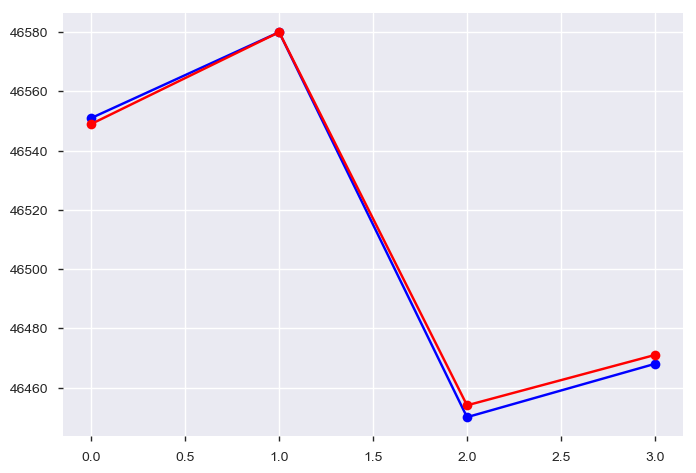

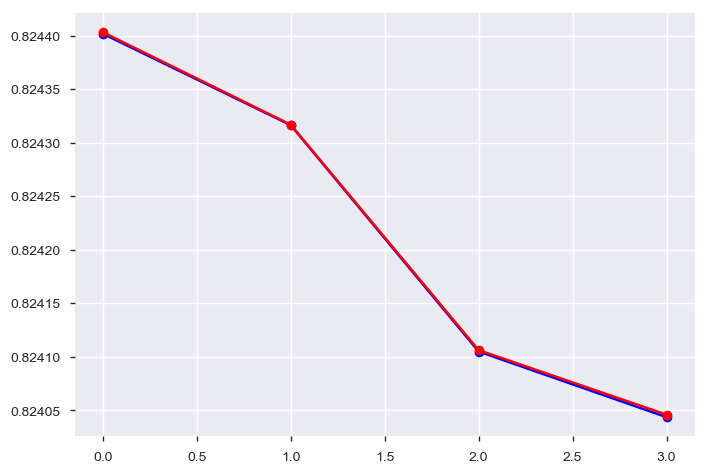

In [37]:
check_prediction_with_dropped_col(column_to_drop=29, parts=4, y=y, tX=tX);  # PRI_jet_all_pt

--- Part 1:  [0..62500] ---
Loss = 0.8244017150918888
Good prediction: 46551/62500 (74.4816%)
Wrong prediction: 15949/62500 (25.5184%)
Loss dropped = 0.8249444058720392
Good prediction: 46564/62500 (74.5024%)
Wrong prediction: 15936/62500 (25.4976%)
--- Part 2:  [62500..187500] ---
Loss = 0.8243163471430626
Good prediction: 46580/62500 (74.528%)
Wrong prediction: 15920/62500 (25.472%)
Loss dropped = 0.8247365524155503
Good prediction: 46541/62500 (74.4656%)
Wrong prediction: 15959/62500 (25.5344%)
--- Part 3:  [125000..312500] ---
Loss = 0.8241049832079662
Good prediction: 46450/62500 (74.32%)
Wrong prediction: 16050/62500 (25.68%)
Loss dropped = 0.8245496298916688
Good prediction: 46448/62500 (74.3168%)
Wrong prediction: 16052/62500 (25.6832%)
--- Part 4:  [187500..437500] ---
Loss = 0.8240437067882067
Good prediction: 46468/62500 (74.3488%)
Wrong prediction: 16032/62500 (25.6512%)
Loss dropped = 0.8244947300964174
Good prediction: 46442/62500 (74.3072%)
Wrong prediction: 16058/62500 

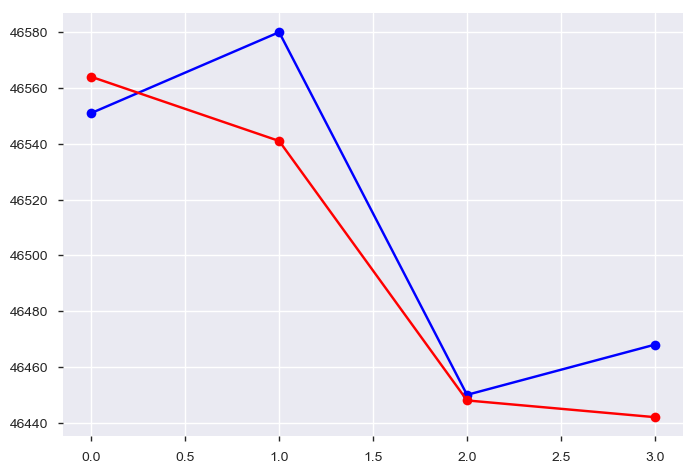

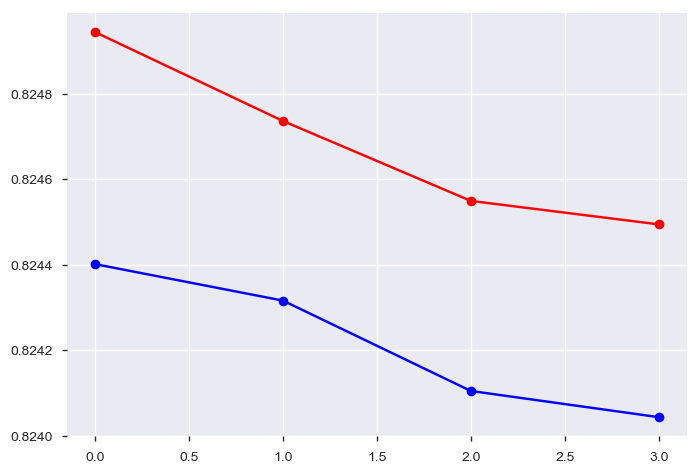

In [38]:
check_prediction_with_dropped_col(column_to_drop=21, parts=4, y=y, tX=tX);

--- Part 1:  [0..62500] ---
Loss = 0.8244017150918888
Good prediction: 46551/62500 (74.4816%)
Wrong prediction: 15949/62500 (25.5184%)
Loss dropped = 0.8351742549475127
Good prediction: 46088/62500 (73.7408%)
Wrong prediction: 16412/62500 (26.2592%)
--- Part 2:  [62500..187500] ---
Loss = 0.8243163471430626
Good prediction: 46580/62500 (74.528%)
Wrong prediction: 15920/62500 (25.472%)
Loss dropped = 0.835377613121937
Good prediction: 46097/62500 (73.7552%)
Wrong prediction: 16403/62500 (26.2448%)
--- Part 3:  [125000..312500] ---
Loss = 0.8241049832079662
Good prediction: 46450/62500 (74.32%)
Wrong prediction: 16050/62500 (25.68%)
Loss dropped = 0.8349607371119181
Good prediction: 46115/62500 (73.784%)
Wrong prediction: 16385/62500 (26.216%)
--- Part 4:  [187500..437500] ---
Loss = 0.8240437067882067
Good prediction: 46468/62500 (74.3488%)
Wrong prediction: 16032/62500 (25.6512%)
Loss dropped = 0.834999870658624
Good prediction: 46070/62500 (73.712%)
Wrong prediction: 16430/62500 (26.2

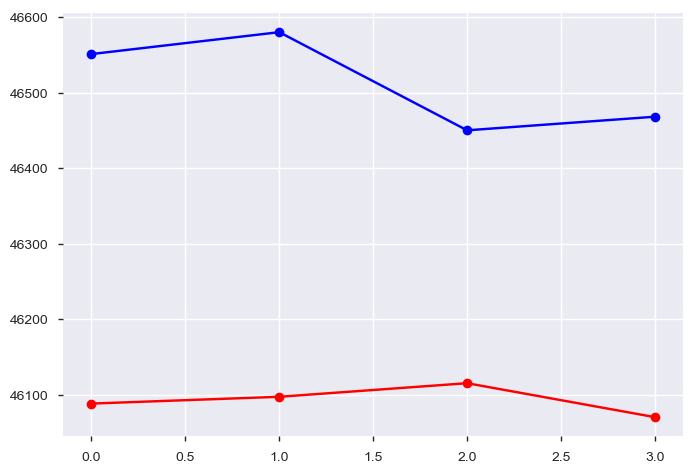

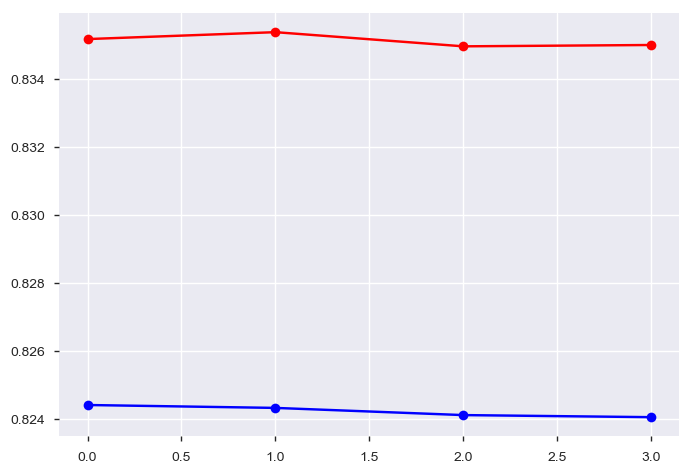

In [39]:
check_prediction_with_dropped_col(column_to_drop=2, parts=4, y=y, tX=tX);

#### CONCLUSION: We will remove only the column `PRI_jet_all_pt` since it gave us a small improvement in result predictions (using Least Squares method). However, we will need to check the performance for other methods as well. 

### Missing Values

In [40]:
df_train[np.isnan(df_train.PRI_jet_subleading_pt)].shape[0]

177457

In [41]:
df_train[(df_train.PRI_jet_num == 0)|(df_train.PRI_jet_num == 1)].shape[0]

177457

In [42]:
df_train[(df_train.PRI_jet_num == 0)|(df_train.PRI_jet_num == 1)&(np.isnan(df_train.PRI_jet_subleading_pt))].shape[0]

177457

In [43]:
df_train[np.isnan(df_train.PRI_jet_leading_pt)|np.isnan(df_train.PRI_jet_leading_eta)|np.isnan(df_train.PRI_jet_leading_phi)].shape[0]

99913

In [44]:
columns_all = set(df_train.columns)
df_train.shape

(250000, 32)

In [45]:
df_train.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,NaN,NaN,NaN,3.473,...,-1.916,164.546,1,46.226,0.725,1.158,NaN,NaN,NaN,46.226
2,100002,b,NaN,162.172,125.953,35.635,NaN,NaN,NaN,3.148,...,-2.186,260.414,1,44.251,2.053,-2.028,NaN,NaN,NaN,44.251
3,100003,b,143.905,81.417,80.943,0.414,NaN,NaN,NaN,3.310,...,0.060,86.062,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
4,100004,b,175.864,16.915,134.805,16.405,NaN,NaN,NaN,3.891,...,-0.871,53.131,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000


---

In [46]:
df_jet_num_0 = df_train[df_train.PRI_jet_num == 0].dropna(axis=1, how='all')
df_jet_num_0.shape

(99913, 22)

In [47]:
print(f"Dropped columns (Jet 0): {list(set(df_train.columns) - set(df_jet_num_0.columns))}")

Dropped columns (Jet 0): ['PRI_jet_subleading_eta', 'DER_lep_eta_centrality', 'PRI_jet_leading_pt', 'PRI_jet_subleading_phi', 'PRI_jet_leading_eta', 'DER_deltaeta_jet_jet', 'DER_prodeta_jet_jet', 'PRI_jet_subleading_pt', 'PRI_jet_leading_phi', 'DER_mass_jet_jet']


In [48]:
df_jet_num_0.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,...,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_all_pt
3,100003,b,143.905,81.417,80.943,0.414,3.310,0.414,75.968,2.354,...,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,0.0
4,100004,b,175.864,16.915,134.805,16.405,3.891,16.405,57.983,1.056,...,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,0.0
8,100008,b,105.594,50.559,100.989,4.288,2.904,4.288,65.333,0.675,...,2.433,-2.532,26.325,0.210,1.884,37.791,0.024,129.804,0,0.0
10,100010,b,NaN,86.240,79.692,27.201,2.338,27.201,81.734,1.750,...,-0.866,2.878,52.016,0.126,-1.288,51.276,0.688,250.178,0,0.0
13,100013,b,82.488,31.663,64.128,8.232,2.823,8.232,58.649,1.303,...,-0.654,-2.990,33.179,-1.665,-0.354,12.439,1.433,163.420,0,0.0


---

In [49]:
df_jet_num_1 = df_train[df_train.PRI_jet_num == 1].dropna(axis=1, how='all')
df_jet_num_1.shape

(77544, 25)

In [50]:
print(f"Dropped columns (Jet 0): {list(set(df_train.columns) - set(df_jet_num_1.columns))}")

Dropped columns (Jet 0): ['PRI_jet_subleading_eta', 'DER_lep_eta_centrality', 'PRI_jet_subleading_phi', 'DER_deltaeta_jet_jet', 'DER_prodeta_jet_jet', 'PRI_jet_subleading_pt', 'DER_mass_jet_jet']


In [51]:
df_jet_num_1.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,...,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_all_pt
1,100001,b,160.937,68.768,103.235,48.146,3.473,2.078,125.157,0.879,...,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,46.226
2,100002,b,NaN,162.172,125.953,35.635,3.148,9.336,197.814,3.776,...,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,44.251
7,100007,s,154.916,10.418,94.714,29.169,2.897,1.526,138.178,0.365,...,0.506,-1.347,22.275,-1.761,187.299,1,30.638,-0.715,-1.724,30.638
9,100009,s,128.053,88.941,69.272,193.392,1.609,28.859,255.123,0.599,...,-0.317,-0.636,132.678,0.845,294.741,1,167.735,-2.767,-2.514,167.735
12,100012,b,145.297,64.234,103.565,106.999,2.183,24.660,192.245,0.576,...,0.722,-0.035,43.910,-1.907,232.362,1,93.117,-0.970,1.943,93.117


---

In [52]:
df_jet_num_2 = df_train[df_train.PRI_jet_num == 2].dropna(axis=1, how='all')
df_jet_num_2.shape

(50379, 32)

In [53]:
df_jet_num_2.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497
6,100006,s,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,...,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877
23,100023,s,141.481,0.736,111.581,174.075,1.955,364.344,-0.923,1.335,...,-0.973,454.785,2,195.533,1.156,1.416,82.477,-0.798,-2.785,278.009
27,100027,s,111.271,27.180,70.642,144.766,4.936,1021.322,-5.834,1.795,...,-1.173,289.876,2,170.712,-1.961,2.220,43.458,2.974,-0.103,214.170
29,100029,b,98.761,14.024,74.230,132.806,3.676,315.854,-2.665,1.261,...,1.150,357.815,2,80.627,0.993,-2.018,32.625,-2.683,-1.467,113.252


---

In [54]:
df_jet_num_3 = df_train[df_train.PRI_jet_num == 3].dropna(axis=1, how='all')
df_jet_num_3.shape

(22164, 32)

In [55]:
df_jet_num_3.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
5,100005,b,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,...,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660
11,100011,b,114.744,10.286,75.712,30.816,2.563,252.599,-1.401,2.888,...,2.148,290.547,3,76.773,-0.790,0.303,56.876,1.773,-2.079,165.640
31,100031,s,121.681,6.041,73.202,198.114,2.639,295.942,-1.738,1.148,...,-2.769,515.415,3,182.449,1.383,0.001,38.006,-1.257,-0.609,253.461
38,100038,s,138.362,38.034,99.038,65.021,1.814,275.461,1.506,2.605,...,-0.299,453.690,3,114.602,0.619,0.165,77.053,2.433,-2.637,341.947
39,100039,s,120.506,22.729,88.889,35.999,0.218,167.175,5.170,2.465,...,1.290,243.867,3,88.399,-2.168,-1.423,77.270,-2.385,1.876,198.632


---

In [56]:
y, tX, _ = load_csv_data('data/train.csv')

In [57]:
y.shape

(250000,)

In [58]:
tX.shape

(250000, 30)

In [59]:
def check_prediction_for_different_jet(parts, y, tX):
    prediction = {}
    prediction_dropped = {}

    ratio = (parts-1)/parts  # if parts=4, training data is 75%

    for part in range(parts):
        start_test = part * int((1-ratio)*len(tX))
        print("---", f"Part {part+1}: ", f"[{start_test}..{start_test + (part+1) * int((1-ratio)*len(tX))}]", "---")

        x_train, y_train, x_test, y_test = split_data(tX, y, ratio, random_enabled=False, start_test=start_test)
        
        loss, w = least_square(y_train, x_train)
        print(f"Loss = {loss}")
        good, _ = print_prediction(y=y_test, x=x_test, w=w)
        prediction[part] = (good, loss)
#
#         x_train, x_test = np.delete(x_train, column_to_drop, axis=1), np.delete(x_test, column_to_drop, axis=1)
#         loss, w = least_square(y_train, x_train)
#         print(f"Loss dropped = {loss}")
#         good, _ = print_prediction(y=y_test, x=x_test, w=w)
#         prediction_dropped[part] = (good, loss)
    
    print("\n=== Results ===")
    goods = [v[0] for v in prediction.values()]
    print(goods)
    #goods_dropped = [v[0] for v in prediction_dropped.values()]
    #diff_goods = np.asarray(goods_dropped) - np.asarray(goods)
    #print("Prediction difference between default data and with removed column:")
    #print(diff_goods)
    #print(np.mean(diff_goods), " samples")

    losses = [v[1] for v in prediction.values()]
    print(losses)
    #losses_dropped = [v[1] for v in prediction_dropped.values()]
    #print("\nLoss difference between default data and with removed column:")
    #diff_losses = np.asarray(losses_dropped) - np.asarray(losses)
    #print(diff_losses)
    #print(np.mean(diff_losses))
    
    print("\n=== Plot ===")
    fig, axes = plt.subplots()
    axes.plot(range(parts), goods, 'b', marker='o')
    #axes.plot(range(parts), goods_dropped, 'r', marker='o')

    fig, axes = plt.subplots()
    axes.plot(range(parts), losses, 'b', marker='o')
    #axes.plot(range(parts), losses_dropped, 'r', marker='o')

    return prediction

--- Part 1:  [0..62500] ---
Loss = 0.8244017150918888
Good prediction: 46551/62500 (74.4816%)
Wrong prediction: 15949/62500 (25.5184%)
--- Part 2:  [62500..187500] ---
Loss = 0.8243163471430626
Good prediction: 46580/62500 (74.528%)
Wrong prediction: 15920/62500 (25.472%)
--- Part 3:  [125000..312500] ---
Loss = 0.8241049832079662
Good prediction: 46450/62500 (74.32%)
Wrong prediction: 16050/62500 (25.68%)
--- Part 4:  [187500..437500] ---
Loss = 0.8240437067882067
Good prediction: 46468/62500 (74.3488%)
Wrong prediction: 16032/62500 (25.6512%)

=== Results ===
[46551, 46580, 46450, 46468]
[0.8244017150918888, 0.8243163471430626, 0.8241049832079662, 0.8240437067882067]

=== Plot ===


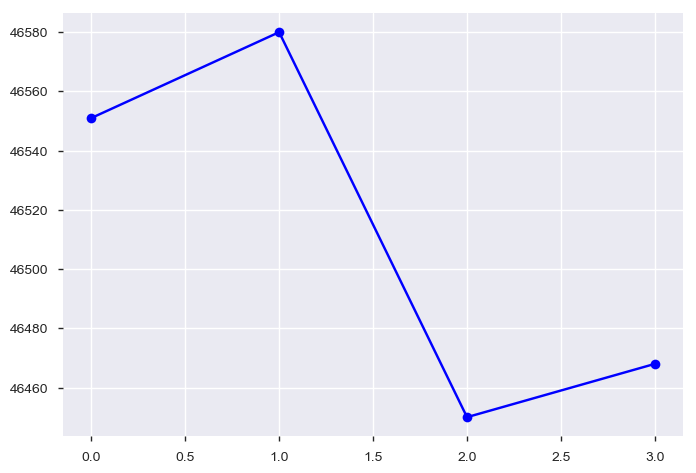

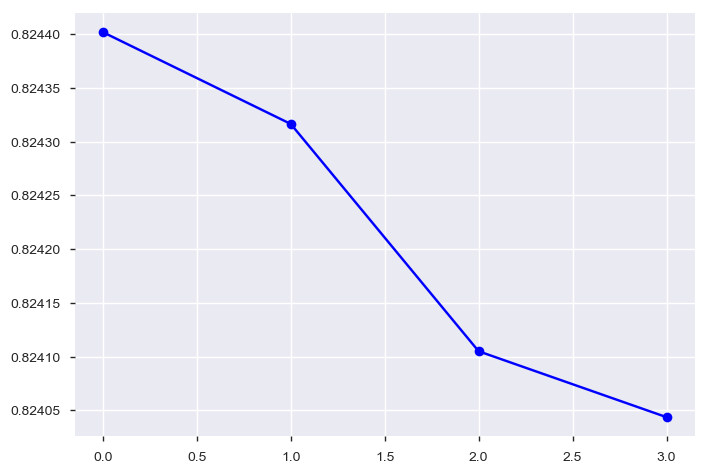

In [60]:
check_prediction_for_different_jet(parts=4, y=y, tX=tX);

In [61]:
jet0 = tX[:,22] == 0

In [62]:
tX[jet0].shape

(99913, 30)

In [63]:
y[jet0].shape

(99913,)

In [64]:
columns_to_drop = [df_train.columns.get_loc(col) for col in list(set(df_train.columns) - set(df_jet_num_0.columns))]
columns_to_drop  

[29, 14, 25, 30, 26, 6, 8, 28, 27, 7]

In [65]:
# #tX_jet_0 = np.delete(tX_jet_0, columns_to_drop, axis=1)
# check_prediction_for_different_jet(parts=4, y=y[jet0], tX=tX[jet0]);

In [66]:
# check_prediction_with_dropped_col(column_to_drop=[29], parts=4, y=y_jet_0, tX=tX_jet_0);